In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
travel = pd.read_csv("Travel_insurance.csv")


In [3]:
travel.head(5)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [4]:
travel.drop("Unnamed: 0", axis = 1, inplace = True)

In [5]:
travel

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [6]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
labelencoder = LabelEncoder()
travel["GraduateOrNot"] = labelencoder.fit_transform(travel["GraduateOrNot"])
travel["Employment Type"] = labelencoder.fit_transform(travel["Employment Type"])
travel["FrequentFlyer"] = labelencoder.fit_transform(travel["FrequentFlyer"])
travel["EverTravelledAbroad"] = labelencoder.fit_transform(travel["EverTravelledAbroad"])

In [9]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  1987 non-null   int64
 1   Employment Type      1987 non-null   int32
 2   GraduateOrNot        1987 non-null   int32
 3   AnnualIncome         1987 non-null   int64
 4   FamilyMembers        1987 non-null   int64
 5   ChronicDiseases      1987 non-null   int64
 6   FrequentFlyer        1987 non-null   int32
 7   EverTravelledAbroad  1987 non-null   int32
 8   TravelInsurance      1987 non-null   int64
dtypes: int32(4), int64(5)
memory usage: 108.8 KB


In [10]:
travel["GraduateOrNot"].value_counts()

1    1692
0     295
Name: GraduateOrNot, dtype: int64

In [11]:
#Lets make some exploratory analysis, first we are going to separate the dataframe into 2, based on graduate or not graduate

grad = travel["GraduateOrNot"] == 1
dfgrad = travel[grad]
not_grad = travel["GraduateOrNot"] == 0
dfnotgrad= travel[not_grad]

In [12]:
#average income
grad_income = dfgrad["AnnualIncome"].mean()
notgrad_income = dfnotgrad["AnnualIncome"].mean()
incomes = [grad_income, notgrad_income]

Text(0.5, 0, 'Graduation')

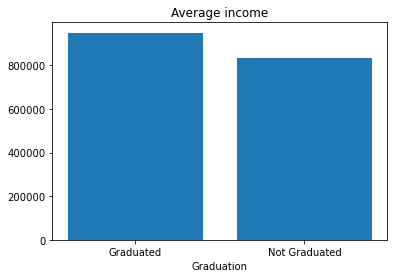

In [13]:
situation = ["Graduated", "Not Graduated"]
plt.bar(situation, incomes) 
plt.title("Average income")
plt.xlabel("Graduation")

In [14]:
#Ever Travelled Abroad
#From graduated
dfgrad["EverTravelledAbroad"].value_counts()

0    1351
1     341
Name: EverTravelledAbroad, dtype: int64

Text(0.5, 0, 'Travelled')

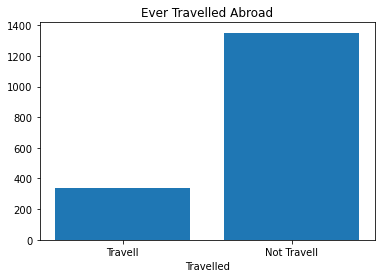

In [15]:
yt = 341
nt = 1351
counts = [yt, nt]
plt.bar(["Travell", "Not Travell"], counts) 
plt.title("Ever Travelled Abroad")
plt.xlabel("Travelled")

In [16]:
#Lets find out the %
travell = (yt /dfgrad["EverTravelledAbroad"].count()) * 100
not_travell = (nt /dfgrad["EverTravelledAbroad"].count()) * 100


Text(0.5, 0, 'Travelled')

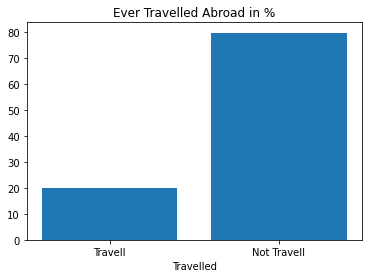

In [17]:
plt.bar(["Travell", "Not Travell"], [travell, not_travell]) 
plt.title("Ever Travelled Abroad in %")
plt.xlabel("Travelled")

In [18]:
#Ever Travelled Abroad
#From not graduated
dfnotgrad["EverTravelledAbroad"].value_counts()
yt = 39
nt = 256
counts = [yt, nt]

Text(0.5, 0, 'Travelled')

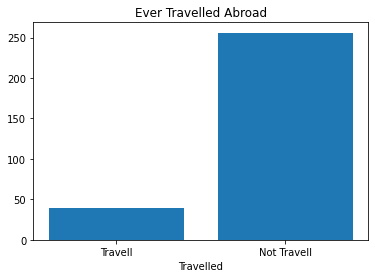

In [19]:
plt.bar(["Travell", "Not Travell"], counts) 
plt.title("Ever Travelled Abroad")
plt.xlabel("Travelled")

Text(0.5, 0, 'Travelled')

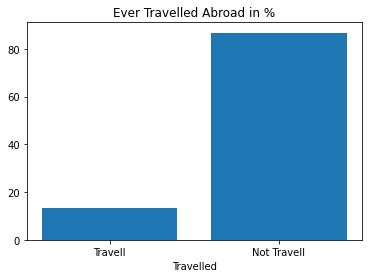

In [20]:
#Lets find out the %
travell = (yt /dfnotgrad["EverTravelledAbroad"].count()) * 100
not_travell = (nt /dfnotgrad["EverTravelledAbroad"].count()) * 100
plt.bar(["Travell", "Not Travell"], [travell, not_travell]) 
plt.title("Ever Travelled Abroad in %")
plt.xlabel("Travelled")


In [21]:
#Lets divide the income into 2 parts, 1 for equal or above average and 0 for bellow average.
x = travel["AnnualIncome"].mean()
above = travel["AnnualIncome"] >= x
travel.loc[above, "AnnualIncome"] = 1
bellow = travel["AnnualIncome"] != 1
travel.loc[bellow, "AnnualIncome"] = 0

In [22]:
travel["AnnualIncome"]

0       0
1       1
2       0
3       0
4       0
       ..
1982    1
1983    1
1984    1
1985    1
1986    0
Name: AnnualIncome, Length: 1987, dtype: int64

In [23]:
x

932762.9592350277

In [24]:
travel.head(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,0,6,1,0,0,0
1,31,1,1,1,7,0,0,0,0
2,34,1,1,0,4,1,0,0,1
3,28,1,1,0,3,1,0,0,0
4,28,1,1,0,8,1,1,0,0


In [25]:
y_target = travel["TravelInsurance"]
x_features = travel.loc[:,"Age":"EverTravelledAbroad"]

In [26]:
#Modeling prediction
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [27]:
# Lets split in 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.2, random_state=42)

In [28]:
model = LogisticRegression(random_state=0, max_iter=1000).fit(x_train, y_train)


In [29]:
#Lets apply cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_features, y_target, cv=5)

In [30]:
scores

array([0.72110553, 0.76130653, 0.78085642, 0.74307305, 0.74559194])

In [31]:
average_score = scores.mean()
deviation_score = scores.std()

In [32]:
average_score

0.7503866941761705

In [33]:
deviation_score

0.019907350732886357

In [34]:
predictions = model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7412060301507538

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [36]:
cf_matrix = confusion_matrix(y_test, predictions)

In [37]:
cf_matrix

array([[235,  22],
       [ 81,  60]], dtype=int64)

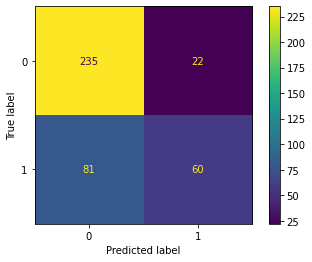

In [38]:
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
plt.show()